Formation OpenClassrooms DS-IML

**Projet 2**

Par **Marc Lefèvre**, <marc.lefevre@noos.fr>

# ANALYSE DE DONNÉES EXPLORATOIRE : Open Food Facts

## 3ème Partie

# Analyses bivariées

Récupération des données et chargement des bibliothèques Python que nous allons utiliser.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from P2_anova import *

In [2]:
df = pd.read_csv("Data/df_red2.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429501 entries, 0 to 1429500
Data columns (total 29 columns):
code                                       1429501 non-null object
url                                        1429501 non-null object
countries_en                               1427224 non-null object
product_name                               1364034 non-null object
brands                                     787138 non-null object
allergens                                  168148 non-null object
nova_group                                 549484 non-null float64
additives_en                               367932 non-null object
additives_n                                631763 non-null float64
ingredients_from_palm_oil_n                631763 non-null float64
ingredients_that_may_be_from_palm_oil_n    631763 non-null float64
nutriscore_score                           577124 non-null float64
nutriscore_grade                           577124 non-null object
energy-kcal_100g    

In [3]:
df.describe()

,nova_group,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,549484.000000,631763.000000,631763.000000,631763.000000,577124.000000,1.080922e+06,1.149613e+06,1.140698e+06,1.096343e+06,260426.000000,...,1.140190e+06,1.120428e+06,441577.000000,1.142039e+06,1.121232e+06,1.121226e+06,210183.000000,217660.000000,266350.000000,261794.000000
mean,3.442766,2.015004,0.021047,0.070555,9.150829,2.702619e+02,1.125848e+03,1.315571e+01,5.083144e+00,0.043440,...,2.829318e+01,1.360649e+01,2.947796,8.518977e+00,1.336967e+00,5.348405e-01,0.001764,0.023376,0.115216,0.006053
std,0.954047,2.847970,0.145394,0.303870,8.940119,1.906466e+02,7.942968e+02,1.636455e+01,7.502679e+00,0.653033,...,2.782598e+01,1.942395e+01,4.793672,9.677881e+00,4.789962e+00,1.916614e+00,0.239774,0.705951,1.032063,0.242837
min,1.000000,0.000000,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+02,4.180000e+02,7.000000e-01,1.000000e-01,0.000000,...,3.600000e+00,7.000000e-01,0.000000,1.320000e+00,7.000000e-02,2.800000e-02,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000,10.000000,2.610000e+02,1.079000e+03,6.900000e+00,1.900000e+00,0.000000,...,1.580000e+01,3.900000e+00,1.600000,5.900000e+00,5.511800e-01,2.204720e-01,0.000000,0.000000,0.036000,0.001010
75%,4.000000,3.000000,0.000000,0.000000,16.000000,4.000000e+02,1.669000e+03,2.100000e+01,7.140000e+00,0.000000,...,5.340000e+01,1.957000e+01,3.600000,1.200000e+01,1.377500e+00,5.510000e-01,0.000107,0.004000,0.110000,0.002420
max,4.000000,30.000000,3.000000,6.000000,40.000000,1.492000e+03,6.197000e+03,1.000000e+02,9.990000e+01,83.000000,...,9.999000e+01,9.999000e+01,97.000000,9.990000e+01,9.999000e+01,4.998720e+01,73.000000,90.000000,99.006000,48.900000


Rappelons que la justification de cette analyse exploratoire est de réfléchir sur la **faisabilité** d'un **moteur de recommandation** sur les données **Open Food Facts**.<br>Partant du principe que le premier critère de recommandation de ce moteur pourrait être le **Nutriscore Grade** et que celui-ci gagnerait donc à être complété autant que possible, nous allons particulièrement nous pencher, dans cette 3ème partie, sur la recherche de corrélations entre nos différentes variables et ce **Nutriscore Grade**.

### Energie et sel

Pour commencer, nous allons étudier le cas des deux variables concernant l'apport énergétique des aliments ('energy-kcal_100g' et "energy_100g") ainsi que celui de deux autres concernant la teneur en sel de ceux-ci ("salt_100g" et "sodium_100g"). Nous allons observer leurs *nuages de points* et calculer leurs **coefficient de corrélation** de **Pearson**.

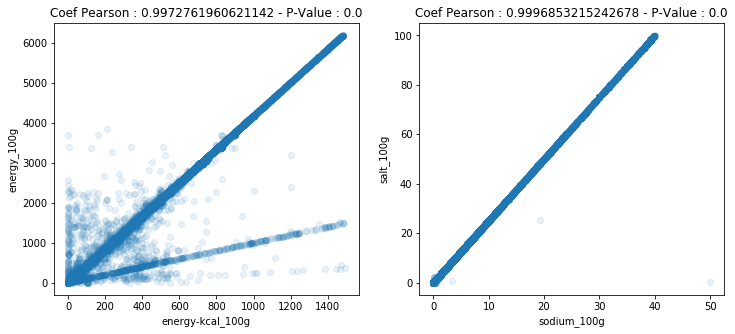

In [5]:
couples = [("energy-kcal_100g", "energy_100g"), ("sodium_100g", "salt_100g")]

i=1
plt.figure(figsize=(12,5))

# on travaille sur une restriction provisoire du set où nos variables ne sont pas nulles.
# sinon cela pose problème pour le calcul du coef. de corr. lin

for cpl in couples :
    df_p = df[(df[cpl[0]].notnull()) & (df[cpl[1]].notnull())]
    
    plt.subplot(1,2,i)
    plt.xlabel(cpl[0])
    plt.ylabel(cpl[1])
    plt.scatter(df_p[cpl[0]], df_p[cpl[1]], alpha=0.1)
    i+=1
    cp, pv = st.pearsonr(df_p[cpl[1]], df_p[cpl[0]])
    plt.title(f"Coef Pearson : {cp} - P-Value : {pv}")
        
plt.show()

On observe dans les deux cas des corrélations presques parfaites, dont les observations visuelles sont confirmées par leurs coéfficients de **Pearson** et leurs **P-Values** associées. 

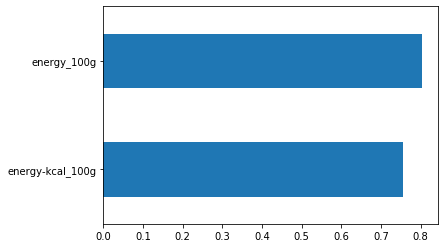

In [6]:
df[["energy-kcal_100g", "energy_100g"]].notnull().mean().plot.barh()

Dans un autre cas de figure, on pourrait se servir de cette corrélation presque parfaite pour compléter en partie celle des deux variables qui est moins renseignée que l'autre (au moyen d'une **regression linéaire**).<br>Sauf que dans nos deux cas présents, les variables étant redondantes entre elles, cela ne présente pas d'intérêt.

Suite à nos observations, nous choisissons plutôt de nous séparer de la variable la moins définie dans les deux couples, c'est à dire de **"energy-kcal_100g"** et **"sodium_100g"**.

In [4]:
df = df.drop(["energy-kcal_100g", "sodium_100g"], axis=1)

### Table de corrélation

Etablissons maintenant une **table de corrélation** de nos variables quantitatives.

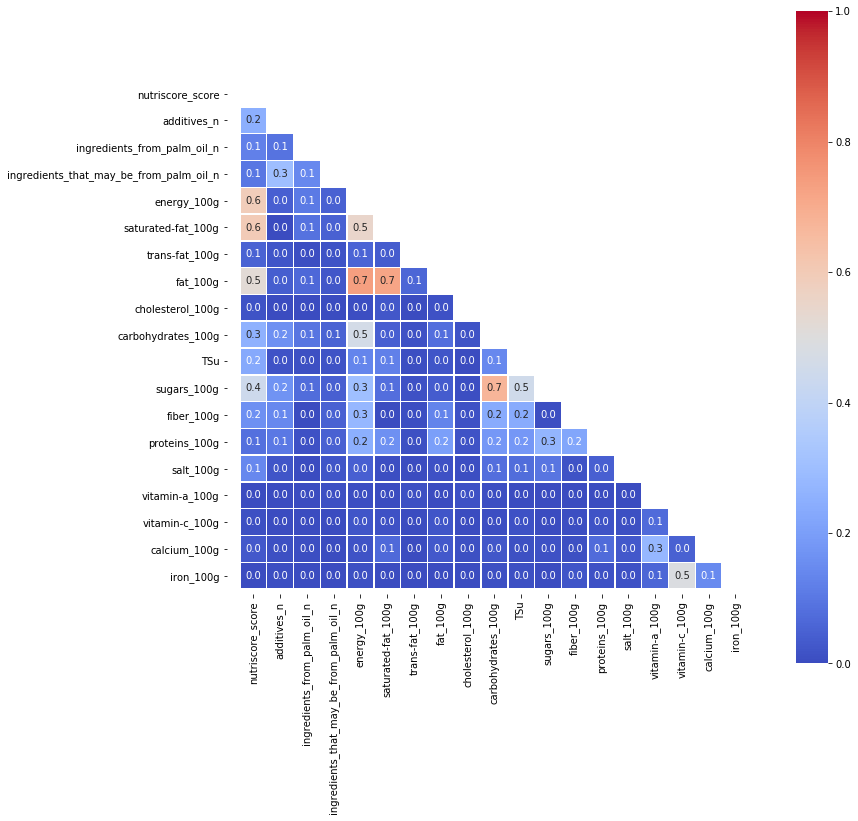

In [52]:
tab = np.abs(df[df.columns[8:]].corr())

mask = np.triu(tab)

plt.figure(figsize = (12,12))
ax = sns.heatmap(tab, annot = True, fmt = ".1f", vmin = 0, vmax = 1, center = 0.5, cmap= 'coolwarm', 
            linecolor = "white", linewidth = 0.5, square = True, mask = mask)

# les 4 lignes suivantes servent à corriger des problèmes de marge du graph...
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.7, top - 0.5)
left, right = ax.get_xlim()
ax.set_xlim(left - 0.5, right + 0.5)

plt.show()

On note que c'est avec les variables **energy_100g**, **fat_100g** et **satured-fat_100g** que le **nutriscore_score**, qui nous intéresse particulièrement, semble le plus corrélé. Etudions ces corrélations avec lui...

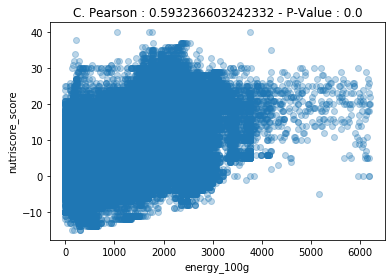

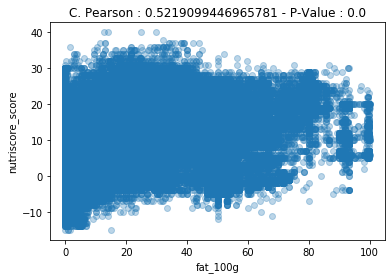

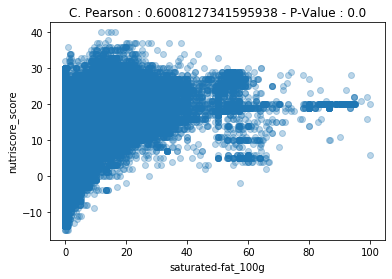

In [15]:

for col in ["energy_100g", "fat_100g", "saturated-fat_100g"] :
    
    df_p = df[(df[col].notnull()) & (df["nutriscore_score"].notnull())]
 
    plt.xlabel(col)
    plt.ylabel("nutriscore_score")
    plt.scatter(df_p[col], df_p["nutriscore_score"], alpha=0.3)
    
    cp, pv = st.pearsonr(df_p[col], df_p["nutriscore_score"])
    plt.title(f"Coef Pearson : {cp} - P_Value : {pv}")
    plt.title(f"C. Pearson : {cp} - P-Value : {pv}")

    plt.show()

Les corrélations restent assez diffuses mais sont statistiquement valides.

Dans la **table de corrélation**, nous notions aussi quelques intéressantes possibilités de corrélations entre les couples suivants :<br>- **sugars_100g** et **carbohydrates_100g**.<br>- **saturated-fat_100g** et **fat_100g**.<br>- **fat_100g** et **energy_100g**<br>Nous allons nous pencher sur elles immédiatemment, ainsi que sur le couple **trans-fat_100g** et encore **fatt_100g**.

In [16]:
couples = [("fat_100g", "energy_100g"), ("fat_100g", "saturated-fat_100g"), ("fat_100g", "trans-fat_100g"), 
           ("carbohydrates_100g", "sugars_100g")]

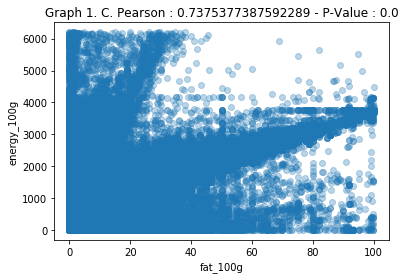

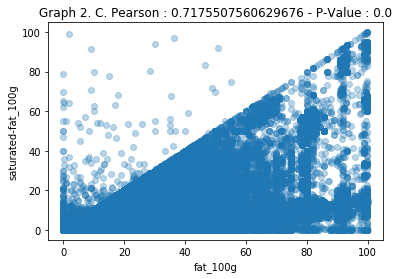

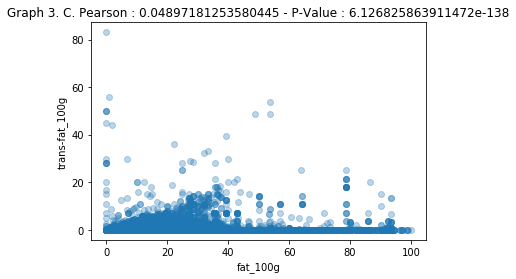

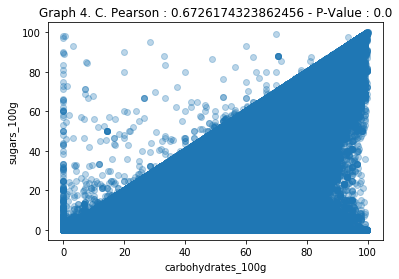

In [17]:
i=0
for cpl in couples :
    
    df_p = df[(df[cpl[0]].notnull()) & (df[cpl[1]].notnull())]
 
    plt.xlabel(cpl[0])
    plt.ylabel(cpl[1])
    plt.scatter(df_p[cpl[0]], df_p[cpl[1]], alpha=0.3)
    
    cp, pv = st.pearsonr(df_p[cpl[1]], df_p[cpl[0]])
    plt.title(f"Coef Pearson : {cp} - P_Value : {pv}")
    plt.title(f"Graph {i+1}. C. Pearson : {cp} - P-Value : {pv}")
    i+=1
    plt.show()

Les **graphes 2 et 4** illustrent des **règles métiers** dont on se doutait, à savoir qu'un nutriment faisant partie d'une famille plus large de nutriments ne peut figurer dans un produit en quantité supérieure à la quantité de son *nutriment parent*.<br>Par exemple, les quantités de sucres (**sugars_100g**) et de graisse saturée (**saturated-fat_100g**) ne peuvent respectivement pas dépasser celles des glucides (**carbohydrates_100g**) et du total des graisses (**fat_100g**).<br>C'est moins visible graphiquement, mais il en est de même dans le **graphe 3** entre les acides gras trans et les graisses (**trans-fat_100g** et **fat_100g**).<br><br>On tire principalement deus choses de cela :<br>- On va pouvoir opérer des corrections supplémentaires sur les variables **sugars_100g**, **saturated-fat_100g** et **trans-fat_100g** qui ne peuvent donc par définition pas être supérieures à respectivement **carbohydrates_100g** et **fat_100g**.<br>- Nous pouvons aussi construire de nouvelles variables comme un **taux** de **sucres dans les glucides**, des taux de **graisse saturée** ou d'**acide gras** trans dans les **graisses**.

On applique les corrections. Cette fois, plutôt que d'éliminer les valeurs problématiques, on leur donne leur valeur théorique maximale.

In [5]:
df.loc[df["saturated-fat_100g"] > df["fat_100g"], "saturated-fat_100g" ] = df["fat_100g"]
df.loc[df["trans-fat_100g"] > df["fat_100g"], "trans-fat_100g" ] = df["fat_100g"]
df.loc[df["sugars_100g"] > df["carbohydrates_100g"], "sugars_100g" ] = df["carbohydrates_100g"]

Constructions des nouvelles variables :

In [6]:
# taux de graisse saturée dans les graisses
df["TGsat"] = df["saturated-fat_100g"] / df["fat_100g"]
# taux d'acides gras trans dans les graisses
df["TAgt"] = df["trans-fat_100g"] / df["fat_100g"]
# taux de sucres dans les glucides
df["TSu"] = df["sugars_100g"] / df["carbohydrates_100g"]

En vue de la suite, on ré-arrange l'ordre des colonnes.

In [7]:
new_order = ['code', 'url', 'countries_en', 'product_name', 'brands', 'allergens', 'nova_group', 
             'additives_en', 'nutriscore_score', 'nutriscore_grade', 'additives_n',  
             'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 
             'saturated-fat_100g','TGsat', 'trans-fat_100g', 'TAgt', 'fat_100g', 'cholesterol_100g', 
             'carbohydrates_100g', 'TSu','sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
             'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']
df = df[new_order]

## Corrélations avec le **nutriscore_grade**

Afin de détecter des corrélations entre nos variables quantitatives et le **nutriscore_grade**, corrélations qui pourrait nous être très utiles dans la création d'un modèle, nous allons observer les **boxplot** du **nutriscore_grade** en fonction de chacune de ces variables.

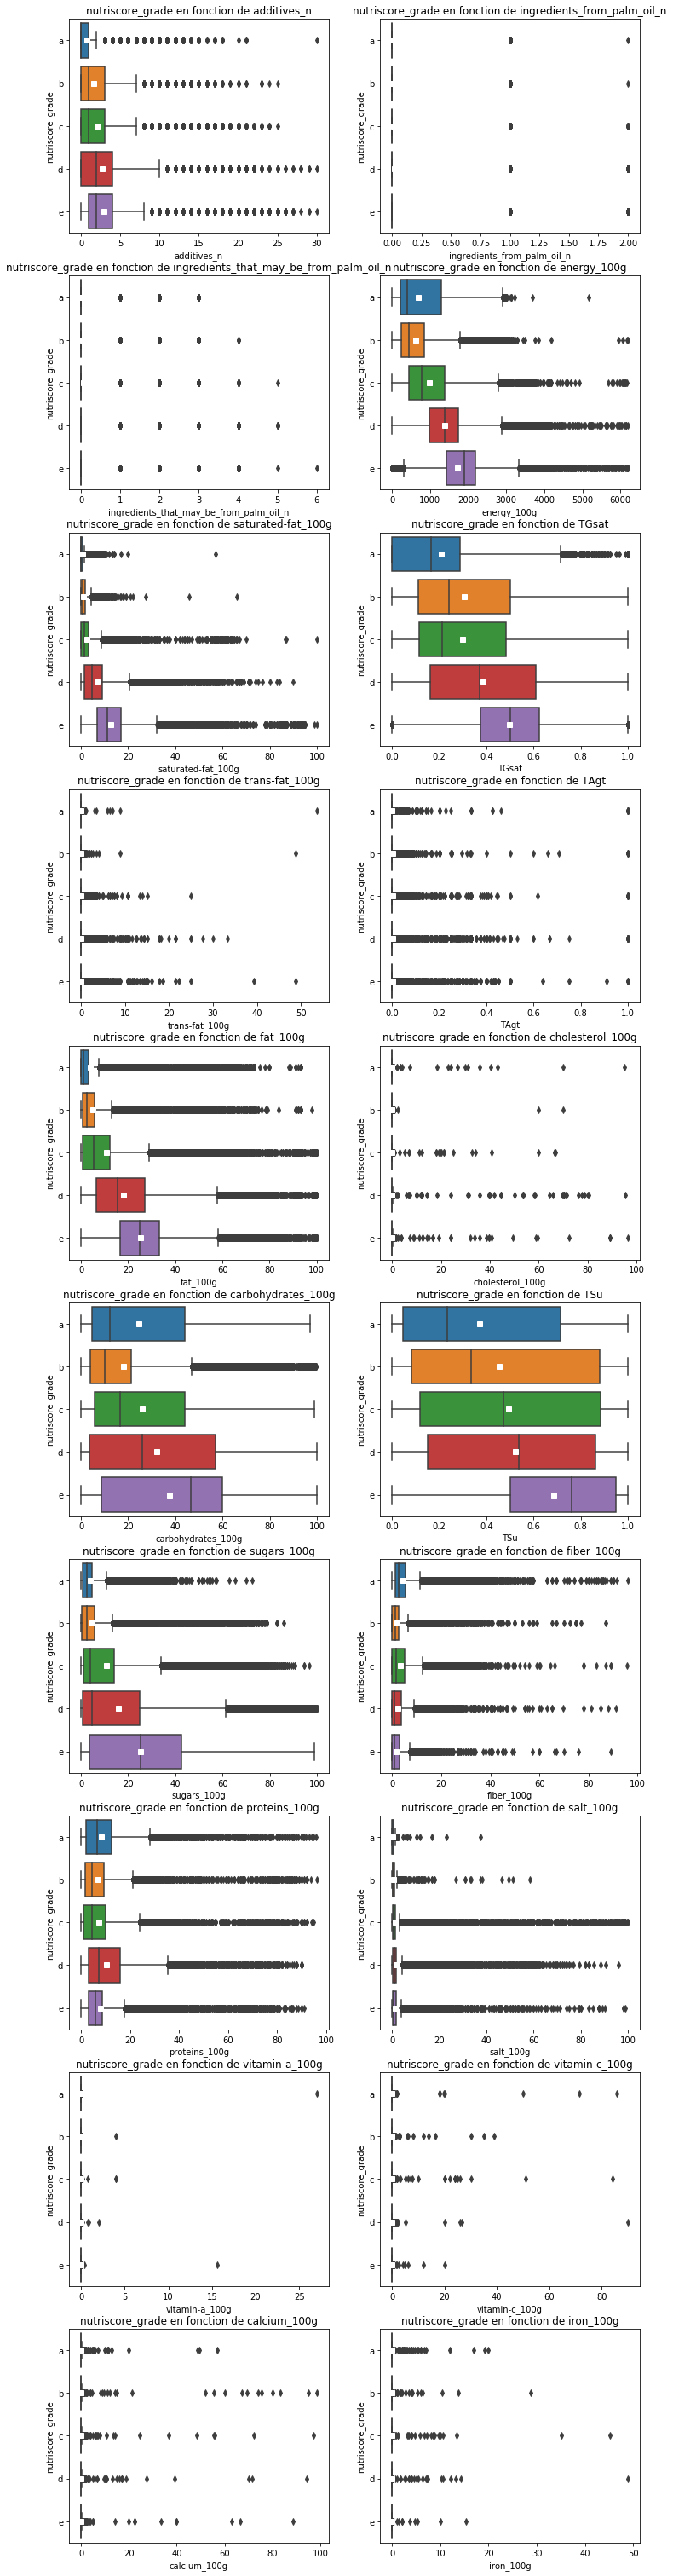

In [31]:
meanp = {"marker":"s", "markerfacecolor":"white", "markeredgecolor":"white"}

i = 1
plt.figure(figsize=(12, 60))
for var in df.columns[10:] :
    plt.subplot(11, 2, i)
    plt.title(f"nutriscore_grade en fonction de {var}")
    sns.boxplot(df[var], df["nutriscore_grade"].sort_values(), showmeans=True, meanprops = meanp)
    i+=1
plt.show()

**Version réduite** (juste les éléments les plus probants) du graph donné par le code ci-dessus.<br>Cette fois nous ajoutons aux graphes les tests statistiques réalisée au moyen de notre fonction **anova**.

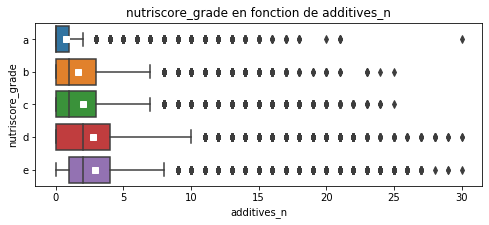

TABLE ANOVA nutriscore_grade en fonction additives_n

                df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)       4.0  2.473285e+05  61832.116508  7554.113932     0.0
Residual  441325.0  3.612344e+06      8.185224          NaN     NaN
SCT                         3.859673e+06
R2 = 0.06408016805367707



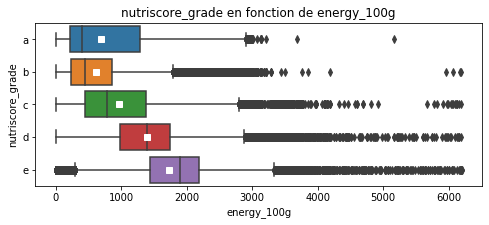

TABLE ANOVA nutriscore_grade en fonction energy_100g

                df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)       4.0  9.231485e+10  2.307871e+10  53129.95376     0.0
Residual  575592.0  2.500270e+11  4.343823e+05          NaN     NaN
SCT                         3.423419e+11
R2 = 0.26965693317154726



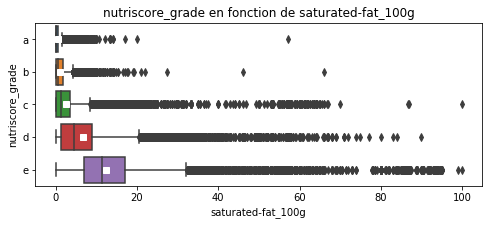

TABLE ANOVA nutriscore_grade en fonction saturated-fat_100g

                df        sum_sq       mean_sq             F  PR(>F)
Q(vqual)       4.0  1.037441e+07  2.593602e+06  65072.039909     0.0
Residual  575531.0  2.293917e+07  3.985739e+01           NaN     NaN
SCT                         3.331357e+07
R2 = 0.31141683776431395



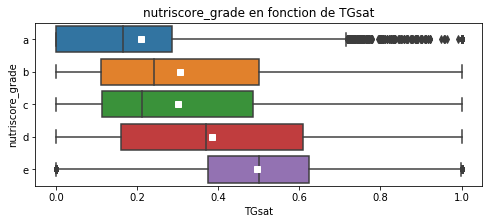

TABLE ANOVA nutriscore_grade en fonction TGsat

                df        sum_sq      mean_sq             F  PR(>F)
Q(vqual)       4.0   4053.561815  1013.390454  18085.527815     0.0
Residual  494552.0  27711.343609     0.056033           NaN     NaN
SCT                         3.176491e+04
R2 = 0.1276113295638641



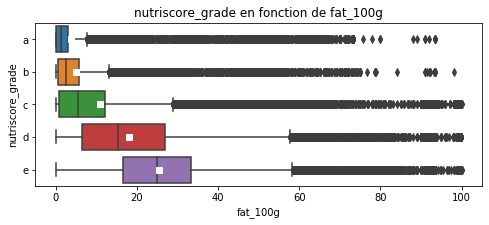

TABLE ANOVA nutriscore_grade en fonction fat_100g

                df        sum_sq       mean_sq             F  PR(>F)
Q(vqual)       4.0  3.399460e+07  8.498651e+06  39831.726509     0.0
Residual  575545.0  1.228005e+08  2.133639e+02           NaN     NaN
SCT                         1.567951e+08
R2 = 0.21680908567687007



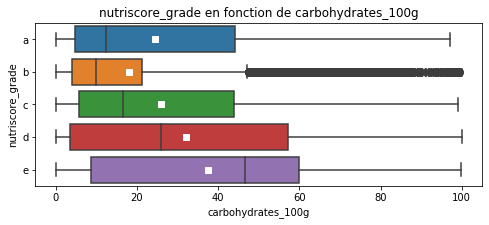

TABLE ANOVA nutriscore_grade en fonction carbohydrates_100g

                df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)       4.0  2.163489e+07  5.408724e+06  7734.584874     0.0
Residual  575289.0  4.022943e+08  6.992907e+02          NaN     NaN
SCT                         4.239292e+08
R2 = 0.05103422013788218



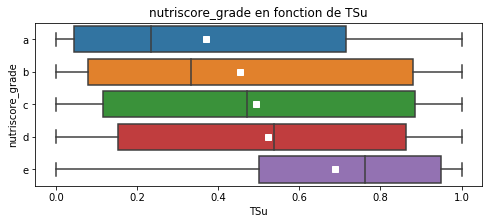

TABLE ANOVA nutriscore_grade en fonction TSu

                df        sum_sq      mean_sq             F  PR(>F)
Q(vqual)       4.0   5287.230420  1321.807605  10578.138197     0.0
Residual  540623.0  67554.382406     0.124957           NaN     NaN
SCT                         7.284161e+04
R2 = 0.07258530138435682



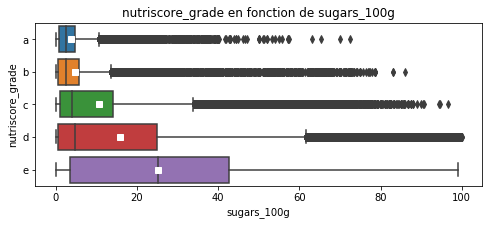

TABLE ANOVA nutriscore_grade en fonction sugars_100g

                df        sum_sq       mean_sq             F  PR(>F)
Q(vqual)       4.0  3.110646e+07  7.776615e+06  28352.255649     0.0
Residual  575534.0  1.578607e+08  2.742856e+02           NaN     NaN
SCT                         1.889671e+08
R2 = 0.16461306505334797



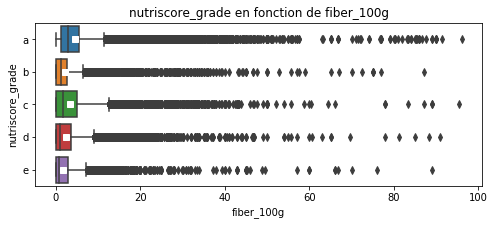

TABLE ANOVA nutriscore_grade en fonction fiber_100g

                df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)       4.0  3.274322e+05  81858.061479  4419.319258     0.0
Residual  355763.0  6.589718e+06     18.522776          NaN     NaN
SCT                         6.917151e+06
R2 = 0.047336289417478965



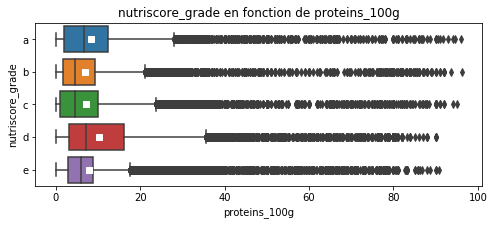

TABLE ANOVA nutriscore_grade en fonction proteins_100g

                df        sum_sq        mean_sq            F  PR(>F)
Q(vqual)       4.0  9.686220e+05  242155.498852  3277.593172     0.0
Residual  575544.0  4.252241e+07      73.882110          NaN     NaN
SCT                         4.349103e+07
R2 = 0.022271766415359134



In [34]:
var_p = ['additives_n', 'energy_100g', 'saturated-fat_100g', 'TGsat', 'fat_100g', 'carbohydrates_100g', 
         'TSu', 'sugars_100g', 'fiber_100g', 'proteins_100g']

meanp = {"marker":"s", "markerfacecolor":"white", "markeredgecolor":"white"}

for var in var_p :
    plt.figure(figsize=(8,3))
    #plt.subplot(5, 2, i)
    plt.title(f"nutriscore_grade en fonction de {var}")
    sns.boxplot(df[var], df["nutriscore_grade"].sort_values(), showmeans = True, meanprops = meanp)
    plt.show()
    anova(df, "nutriscore_grade", var)
    print()

Les variables semblant les plus en corrélation avec **nutriscore_grade** sont :<br>- **energy_100g**<br>- **saturated-fat_100g**<br>- **fat_100g**<br>- **sugar_100g**.<br>Ce sont elles que nous utiliserons en priorité pour notre modèle de **classification**.

Les deux variables **TGsat** et **TAgt** ne nous semblent pas avoir apporté d'éléments pertinents et vont être supprimées et notre dataset sauvegardé.

In [8]:
df = df.drop(["TGsat", "TAgt"], axis=1)

# Nova Group

Analyses **anova** avec l'indice de transformation **nova_croup** après l'avoir mappé en A, B, C, D...

In [39]:
def nova_map(val):
    if val == 1.0 :
        return "a"
    elif val == 2.0 :
        return "b"
    elif val == 3.0 :
        return "c"
    else :
        return "d"
    
df["nova_l"] = df["nova_group"].map(nova_map)

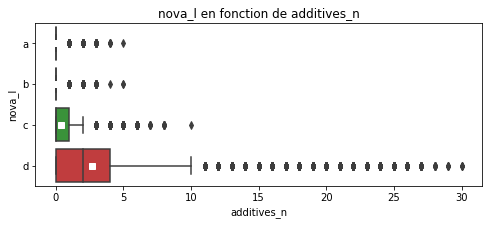

TABLE ANOVA nova_l en fonction additives_n

                df        sum_sq        mean_sq             F  PR(>F)
Q(vqual)       3.0  7.647700e+05  254923.335910  36943.091695     0.0
Residual  631759.0  4.359411e+06       6.900433           NaN     NaN
SCT                         5.124181e+06
R2 = 0.14924727308863658



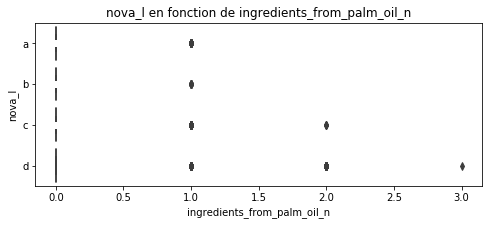

TABLE ANOVA nova_l en fonction ingredients_from_palm_oil_n

                df        sum_sq    mean_sq            F  PR(>F)
Q(vqual)       3.0     72.242081  24.080694  1145.322664     0.0
Residual  631759.0  13282.889980   0.021025          NaN     NaN
SCT                         1.335513e+04
R2 = 0.005409312359727958



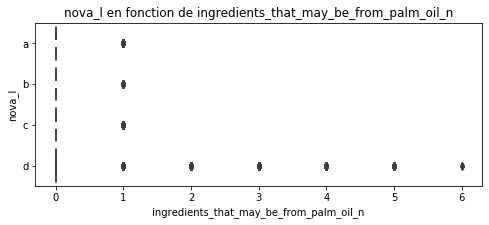

TABLE ANOVA nova_l en fonction ingredients_that_may_be_from_palm_oil_n

                df        sum_sq     mean_sq            F  PR(>F)
Q(vqual)       3.0   1095.655708  365.218569  4030.964746     0.0
Residual  631759.0  57239.428436    0.090603          NaN     NaN
SCT                         5.833508e+04
R2 = 0.018782105551756745



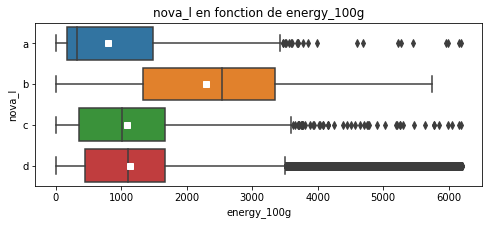

TABLE ANOVA nova_l en fonction energy_100g

                 df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)        3.0  1.553761e+10  5.179204e+09  8388.823086     0.0
Residual  1149609.0  7.097610e+11  6.173934e+05          NaN     NaN
SCT                         7.252986e+11
R2 = 0.021422365309090162



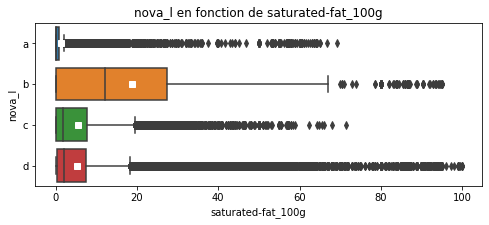

TABLE ANOVA nova_l en fonction saturated-fat_100g

                 df        sum_sq        mean_sq             F  PR(>F)
Q(vqual)        3.0  1.864307e+06  621435.708059  11422.025949     0.0
Residual  1096339.0  5.964828e+07      54.406785           NaN     NaN
SCT                         6.151259e+07
R2 = 0.030307733901445887



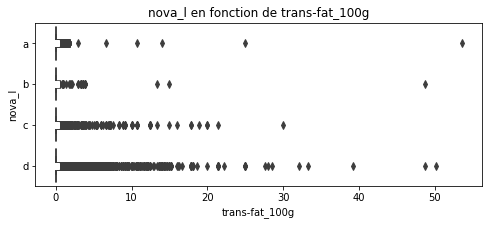

TABLE ANOVA nova_l en fonction trans-fat_100g

                df        sum_sq    mean_sq          F        PR(>F)
Q(vqual)       3.0     59.165985  19.721995  63.511626  4.842133e-41
Residual  260422.0  80867.736805   0.310526        NaN           NaN
SCT                         8.092690e+04
R2 = 0.0007311040385773014



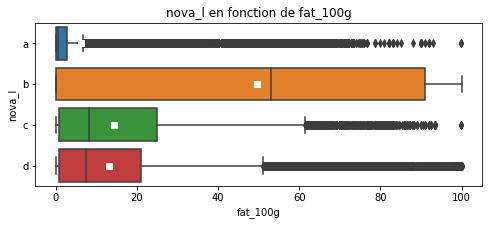

TABLE ANOVA nova_l en fonction fat_100g

                 df        sum_sq       mean_sq             F  PR(>F)
Q(vqual)        3.0  1.215187e+07  4.050624e+06  15752.224205     0.0
Residual  1140694.0  2.933251e+08  2.571461e+02           NaN     NaN
SCT                         3.054769e+08
R2 = 0.03977999567140035



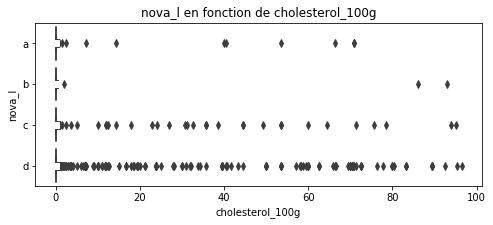

TABLE ANOVA nova_l en fonction cholesterol_100g

                df         sum_sq   mean_sq         F    PR(>F)
Q(vqual)       3.0      16.022211  5.340737  3.829831  0.009354
Residual  264699.0  369125.411519  1.394510       NaN       NaN
SCT                         3.691414e+05
R2 = 4.3403990360736817e-05



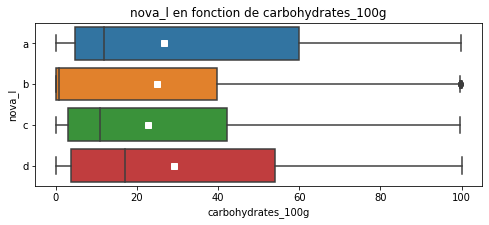

TABLE ANOVA nova_l en fonction carbohydrates_100g

                 df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)        3.0  3.998390e+06  1.332797e+06  1729.152602     0.0
Residual  1140186.0  8.788328e+08  7.707802e+02          NaN     NaN
SCT                         8.828312e+08
R2 = 0.004529053620700306



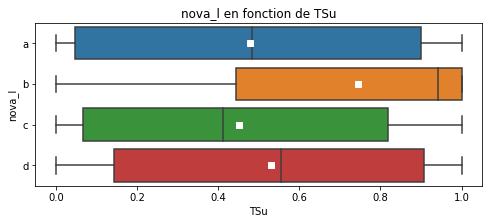

TABLE ANOVA nova_l en fonction TSu

                 df         sum_sq     mean_sq           F  PR(>F)
Q(vqual)        3.0     867.132415  289.044138  2111.12007     0.0
Residual  1042379.0  142717.386969    0.136915         NaN     NaN
SCT                         1.435845e+05
R2 = 0.006039177615788783



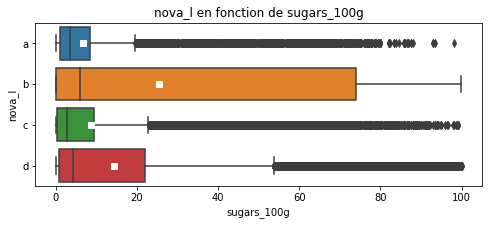

TABLE ANOVA nova_l en fonction sugars_100g

                 df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)        3.0  6.098476e+06  2.032825e+06  5470.790583     0.0
Residual  1120424.0  4.163249e+08  3.715780e+02          NaN     NaN
SCT                         4.224234e+08
R2 = 0.014436881293310173



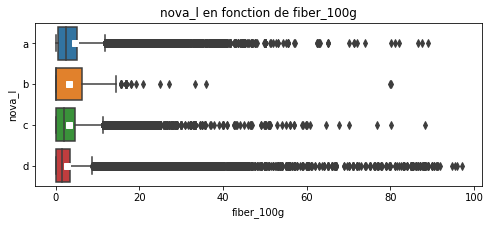

TABLE ANOVA nova_l en fonction fiber_100g

                df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)       3.0  1.155394e+05  38513.116696  1695.284225     0.0
Residual  441573.0  1.003156e+07     22.717793          NaN     NaN
SCT                         1.014710e+07
R2 = 0.011386436525345276



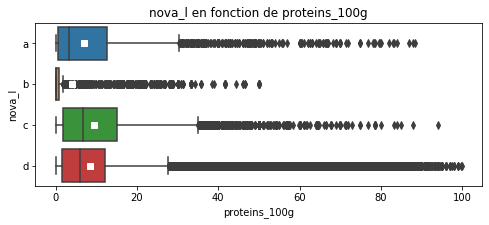

TABLE ANOVA nova_l en fonction proteins_100g

                 df        sum_sq        mean_sq            F  PR(>F)
Q(vqual)        3.0  3.610383e+05  120346.113038  1289.254779     0.0
Residual  1142035.0  1.066038e+08      93.345485          NaN     NaN
SCT                         1.069648e+08
R2 = 0.0033752988972077166



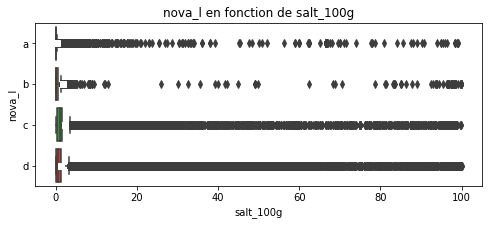

TABLE ANOVA nova_l en fonction salt_100g

                 df        sum_sq       mean_sq            F  PR(>F)
Q(vqual)        3.0  1.298969e+05  43298.980837  1896.753313     0.0
Residual  1121228.0  2.559533e+07     22.827945          NaN     NaN
SCT                         2.572523e+07
R2 = 0.005049399004985929



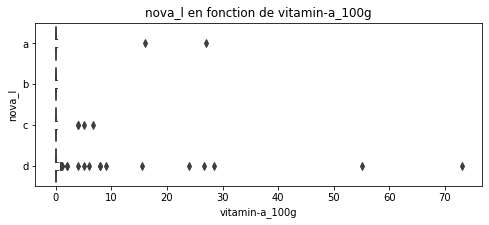

TABLE ANOVA nova_l en fonction vitamin-a_100g

                df        sum_sq   mean_sq         F    PR(>F)
Q(vqual)       3.0      0.080633  0.026878  0.467501  0.704948
Residual  210179.0  12083.633840  0.057492       NaN       NaN
SCT                         1.208371e+04
R2 = 6.6728535225301146e-06



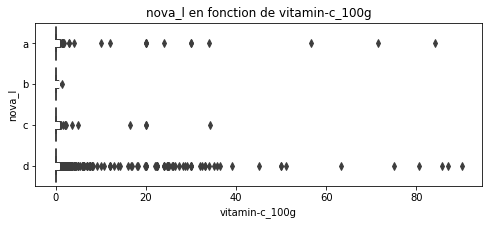

TABLE ANOVA nova_l en fonction vitamin-c_100g

                df         sum_sq   mean_sq         F    PR(>F)
Q(vqual)       3.0      12.483069  4.161023  8.350152  0.000015
Residual  217656.0  108461.688785  0.498317       NaN       NaN
SCT                         1.084742e+05
R2 = 0.00011507872318769461



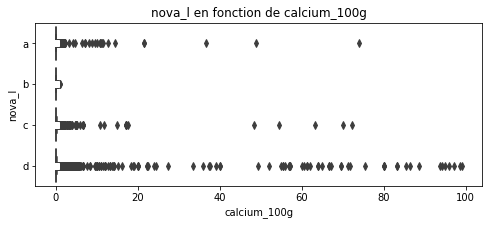

TABLE ANOVA nova_l en fonction calcium_100g

                df         sum_sq    mean_sq          F        PR(>F)
Q(vqual)       3.0      91.200372  30.400124  28.549443  1.896300e-18
Residual  266346.0  283611.539173   1.064824        NaN           NaN
SCT                         2.837027e+05
R2 = 0.00032146454462050997



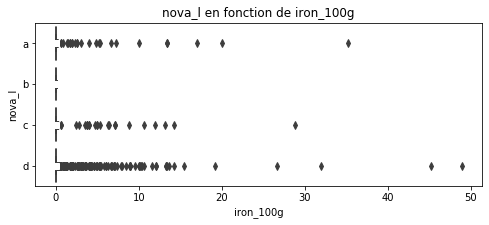

TABLE ANOVA nova_l en fonction iron_100g

                df        sum_sq   mean_sq         F    PR(>F)
Q(vqual)       3.0      0.264964  0.088321  1.497751  0.212896
Residual  261790.0  15437.571959  0.058969       NaN       NaN
SCT                         1.543784e+04
R2 = 1.716327879345956e-05



In [40]:
#var_p = ['additives_n', 'energy_100g', 'saturated-fat_100g', 'fat_100g', 'carbohydrates_100g', 'TSu', 
#         'sugars_100g', 'fiber_100g', 'proteins_100g']

meanp={"marker":"s","markerfacecolor":"white", "markeredgecolor":"white"}

for var in df.columns[10:-1] :
    plt.figure(figsize=(8,3))
    plt.title(f"nova_l en fonction de {var}")
    sns.boxplot(df[var], df["nova_l"].sort_values(), showmeans=True, meanprops = meanp)
    plt.show()
    anova(df, "nova_l", var)
    print()

On ne trouve rien de probant.

## Analyse **nova_group** - **nutriscore_grade**

Pour cette analyse de **deux variables quantitatives** entre elles, nous allons créer un **tableau de contingence** dont nous calculerons le **Chi2**.

Création du tableau de contingence

In [64]:
X = "nutriscore_grade"
Y = "nova_group"
cont_tab = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, 
                                  margins_name="Total").fillna(0).copy().astype(int)
cont_tab

nova_group,1.0,2.0,3.0,4.0,Total
nutriscore_grade,,,,,
a,26297,222,18815,21228,66562
b,8583,174,13424,32095,54276
c,6249,1488,22304,55950,85991
d,2544,869,32135,91041,126589
e,1559,1151,12570,65325,80605
Total,45232,3904,99248,265639,414023


Création de la  **heatmap**.

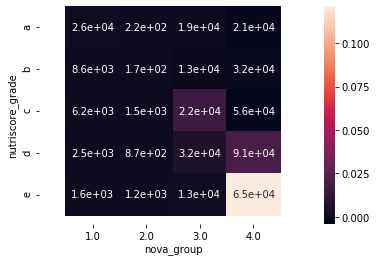

In [65]:
tx = cont_tab.loc[:,["Total"]]
ty = cont_tab.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n
c = cont_tab.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
ax = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.7, top - 0.5)
left, right = ax.get_xlim()
ax.set_xlim(left - 0.5, right + 0.5)

plt.show()

Récupération des indicateurs qui nous intéressent

In [18]:
chi2, p, dof, exp = st.chi2_contingency(cont_tab)

In [69]:
indicateurs = st.chi2_contingency(cont_tab)

In [72]:
for i in range(3):
    print(indicateurs[i])

87453.48413859907
0.0
20


Pour un degré de liberté de **12**, une valeur **Chi2**= 87453.48, et une **p-value** de 0, nous sommes sûr à quasiment 100% que l'hypothèse d'indépendance de nos variables est rejeté, et donc que celles-ci sont corrélées.

In [39]:
len(df[(df["nova_group"].notnull()) & (df["nova_group"].isnull())])

0

Malheureusement, outre que le **nova_group** est légèrement mons renseigné que lui, il s'avère en plus que sa population est incluse dans celle déjà renseignée du **nutriscore_grade**. Cette corrélation ne nous est donc d'aucune utilité pour notre modèle.

## Sauvegarde du dataset

In [ ]:
df.to_csv("Data/df_mod.csv", index = False)

Après avoir bien élagué notre dataset initial, afin de ne garder que des variables utiles à la suite de notre projet, la prochaine étape va être de :<br>- Proposer un modèle qui nous permettra de compléter de la manière la plus satisfaisante possible notre variable **nutriscore_grade**.<br>- Intégrer les nouvelles valeurs du **nutriscore_grade** obtenues grâce à ce modèle à notre dataset.

Fin de la **3ème partie**.